
# MySQL Integration with Python Using Context-Based Cursor
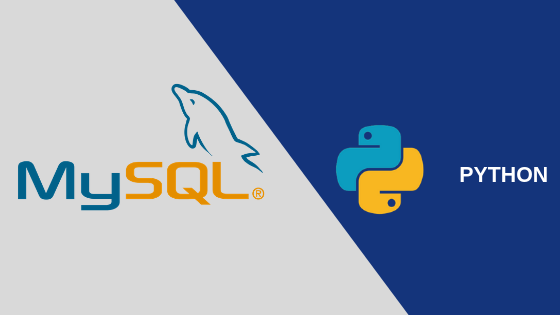  

This lesson demonstrates how to use a context manager with the `mysql-connector-python` library for database operations. 
Context managers ensure resources like database connections and cursors are properly cleaned up, reducing the chances of resource leaks.

### Prerequisite:
Install the required library using:
```bash
pip install mysql-connector-python
```


In [1]:
%pip install mysql-connector-python


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.




[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\atew\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



## Lesson 1: Connecting to MySQL with a Context Manager

Using a context manager ensures the connection is automatically closed after the block is executed.


In [ ]:

# import mysql.connector
# from mysql.connector import connect
from mysql.connector import Error, connect
# 1st step connect to databaser
# Establishing a connection using a context manager
try: 
     with connect( 
        host="localhost",  # Replace with your host
        user="root",       # Replace with your username
        password="top!secret", # Replace with your password
        port=3307 # Replace with your password
    ) as connection:
        if connection.is_connected():
            print("Connected to MySQL Server")
except Error as e:
    print(f"Error: {e}")


Connected to MySQL Server



## Lesson 2: Creating a Database and Table

Here, we'll create a database and a table using a context-based cursor.


In [ ]:

from mysql.connector import Error, connect

# 1st step initialize connection with context
# 2nd ping connection to check connection success
# 3rd step initialize cursor with context from connection context
# 4th step with in the connection execute all your queries
try:
    with connect(
        host="localhost",  # Replace with your host
        user="root",       # Replace with your username
        password="top!secret", # Replace with your password
        port=3307 # Replace with your password
    ) as connection:
        if connection.is_connected():
            with connection.cursor() as cursor: # cursor is query executor
                # Create database and table
                cursor.execute("CREATE DATABASE IF NOT EXISTS SchoolDB;")
                cursor.execute("USE SchoolDB;")
                cursor.execute("""
                    CREATE TABLE IF NOT EXISTS Students (
                        id INT AUTO_INCREMENT PRIMARY KEY,
                        name VARCHAR(255) NOT NULL,
                        age INT NOT NULL,
                        grade VARCHAR(10)
                    );
                """) 
                display("Database and table created successfully")
    
except Error as e:
    display(f"Error: {e}")


"Error: 1045 (28000): Access denied for user 'roots'@'192.168.143.2' (using password: YES)"


## Lesson 3: Inserting Data Using a Context-Based Cursor

We'll insert multiple records into the `Students` table and use `executemany` for batch processing.


In [ ]:

from mysql.connector import Error, connect
data = [
    ("Alice", 14, "8th"), # 1st record
    ("Bob", 15, "9th"), # second record
    ("Charlie", 13, "7th") # third record
]

try:
    with connect(
        host="localhost",  # Replace with your host
        user="root",       # Replace with your username
        password="top!secret", # Replace with your password
        port=3307 # Replace with your password
    ) as connection:
        with connection.cursor() as cursor:
            cursor.execute("USE SchoolDB;")
            # Insert data into the table
            insert_query = """
            INSERT INTO Students (name, age, grade)
            VALUES (%s, %s, %s)
            """
            cursor.executemany(insert_query, data)
            connection.commit()
            print(f"{cursor.rowcount} records inserted.")
except Error as e:
    print(f"Error: {e}")


3 records inserted.



## Lesson 4: Querying Data Using a Context-Based Cursor

We'll fetch and display all records from the `Students` table using a context-based cursor.


In [ ]:
from mysql.connector import Error, connect

try:
    with connect(
        host="localhost",  # Replace with your host
        user="root",       # Replace with your username
        password="top!secret", # Replace with your password
        port=3307 # Replace with your password
    ) as connection:
        with connection.cursor() as cursor:
            cursor.execute("USE SchoolDB;")
            # Query data
            cursor.execute("SELECT * FROM Students")
            records = cursor.fetchall()
            display("Student Records:")
            for record in records:
                display(record)
except Error as e:
    print(f"Error: {e}")


'Student Records:'

(2, 'Alice')

(3, 'Bob')

(4, 'Charlie')


## Lesson 5: Updating Data Using a Context-Based Cursor

We use the `UPDATE` statement to modify a student's grade in the table.


In [13]:
from mysql.connector import Error, connect

try:
    with connect(
        host="localhost",  # Replace with your host
        user="root",       # Replace with your username
        password="top!secret", # Replace with your password
        port=3307 # Replace with your password
    ) as connection:
        with connection.cursor() as cursor:
            cursor.execute("USE SchoolDB;")
            # Update data
            update_query = "UPDATE Students SET grade = %s WHERE name = %s"
            data = ("10th", "Alice")
            cursor.execute(update_query, data)
            connection.commit()
            print(f"Record updated successfully. Affected rows: {cursor.rowcount}")
except Error as e:
    print(f"Error: {e}")


Record updated successfully. Affected rows: 2



## Lesson 6: Deleting Data Using a Context-Based Cursor

To delete a record, we use the `DELETE` SQL statement and commit the transaction.


In [14]:
from mysql.connector import Error, connect

try:
    with connect(
        host="localhost",  # Replace with your host
        user="root",       # Replace with your username
        password="top!secret", # Replace with your password
        port=3307 # Replace with your password
    ) as connection:
        with connection.cursor() as cursor:
            cursor.execute("USE SchoolDB;")
            # Delete data
            delete_query = "DELETE FROM Students WHERE id = %s"
            data = ("1",)
            cursor.execute(delete_query, data)
            connection.commit()
            print(f"Record deleted successfully. Affected rows: {cursor.rowcount}")
except Error as e:
    print(f"Error: {e}")


Record deleted successfully. Affected rows: 1
